---
# Malaria Detection - Deep Learning in Python with Keras
---
## Introduction:

The Malaria Detection project aimed to develop an automated system capable of accurately detecting malaria parasites from blood cell images. By leveraging deep learning techniques, I successfully trained a model that achieves high accuracy in malaria detection. This project showcases the potential of artificial intelligence in addressing critical healthcare challenges and improving disease diagnostics.

---
## Project Overview:

- Malaria is a life-threatening disease that affects millions of people worldwide, particularly in regions with limited access to healthcare facilities.
- Early and accurate diagnosis of malaria is crucial for effective treatment and prevention of the disease.
- The objective of this project was to develop a deep learning model using Python and the Keras library to automate the detection of malaria parasites from microscopic blood cell images.
- By automating the detection process, the model aims to assist healthcare professionals in diagnosing malaria more efficiently and reliably.

---
## Dataset:

- The dataset used in this project is the "Cell Images for Detecting Malaria" dataset available on Kaggle.
- The dataset contains a total of 27,558 images, divided into two classes: infected and uninfected.
- The infected class consists of images with malaria parasites, while the uninfected class contains images without any parasites.
- The dataset was carefully curated and underwent preprocessing steps to ensure data quality and balance between the classes.

---
## Methodology:

This project aims to develop a deep learning model for malaria detection using the following tools and techniques:

1. Keras Library: The Keras library, a popular deep learning framework, will be utilized to build the model. With its user-friendly interface and extensive functionality, Keras provides a convenient platform for implementing neural networks in Python.

2. Convolutional Neural Network (CNN): A CNN architecture will be chosen for its effectiveness in image classification tasks. CNNs are particularly well-suited for analyzing and extracting features from images, making them ideal for detecting patterns associated with malaria parasites.

3. Transfer Learning: Transfer learning will be employed by leveraging a pre-trained CNN model as a starting point. By fine-tuning the model on the specific task of malaria detection, we can benefit from the learned features and accelerate the training process.

4. Labeled Dataset: A carefully curated dataset consisting of blood cell images will be used to train the model. The dataset will be labeled to indicate whether each image contains infected or uninfected cells, enabling the model to learn the distinguishing features between the two classes.

5. Hyperparameter Tuning: To optimize the performance of the model, hyperparameters such as learning rate, batch size, and regularization techniques will be carefully tuned. This iterative process aims to find the best combination of hyperparameters that leads to improved accuracy and generalization.

---
## A Step-by-Step


1. Import Libraries: Begin by importing the necessary libraries, including Keras, NumPy, and Matplotlib.

2. Create Paths for Infected and Uninfected Images: Set up paths for the infected and uninfected image directories in the dataset. This allows easy access to the image data during the training process.

3. Split the Data into Training and Testing Sets: Split the dataset into training and testing sets. This ensures that the model can be trained on a portion of the data and evaluated on unseen data to assess its performance.

4. Create an Image Data Generator with Data Augmentation: Set up an image data generator using the Keras library. Apply data augmentation techniques such as rotation, scaling, and horizontal flipping to augment the training data. This helps to increase the size and diversity of the training dataset and improve the model's ability to generalize.

5. Build the CNN Model: Create a sequential model using the Keras library. Begin by adding convolutional layers with appropriate filters, kernel sizes, and activation functions. Follow them with pooling layers to downsample the feature maps. Add fully connected layers to extract high-level features and make predictions. Finally, compile the model with an appropriate loss function and optimizer.

6. Model Architecture:
   - Input Layer: Specify the input shape corresponding to the image dimensions.
   - Convolutional Layers: Add multiple convolutional layers with increasing filters and appropriate activation functions.
   - Pooling Layers: Intersperse the convolutional layers with pooling layers to reduce the spatial dimensions of the feature maps.
   - Flatten Layer: Flatten the output from the convolutional layers into a one-dimensional vector.
   - Fully Connected Layers: Add one or more dense layers with appropriate activation functions.
   - Output Layer: Add the final dense layer with a softmax activation function for multi-class classification.

7. Compile the Model: Specify the loss function, optimizer, and evaluation metric to be used during training.

8. Train the Model: Fit the model to the training data using the image data generator. Specify the number of epochs and batch size. Monitor the training process and evaluate the model's performance on the validation set.

9. Evaluate the Model: Assess the model's performance on the testing set by calculating metrics such as accuracy, precision, recall, and F1 score. Visualize the results using appropriate plots and graphs.

10. Fine-tune the Model: If necessary, fine-tune the model by adjusting hyperparameters, modifying the architecture, or using additional techniques such as regularization or dropout to improve performance.


---
# Essential Libraries and Modules 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

---
# Data Preparation and Path Handling

In [31]:
data_dir = 'C:/Users/DELL/Documents/Datasets/Plant Diseases Dataset/tomato/train'

# Create paths for infected and uninfected images
healthy_path = os.path.join(data_dir, 'Tomato___healthy')
Bacterial_spot_path = os.path.join(data_dir, 'Tomato___Bacterial_spot')
Early_blight_path = os.path.join(data_dir, 'Tomato___Early_blight')
Late_blight_path = os.path.join(data_dir, 'Tomato___Late_blight')
Leaf_Mold_path = os.path.join(data_dir, 'Tomato___Leaf_Mold')
Septoria_leaf_spot_path = os.path.join(data_dir, 'Tomato___Septoria_leaf_spot')


# Read the images and create labels
healthy_images = [os.path.join(healthy_path, img) for img in os.listdir(healthy_path)]
Bacterial_images = [os.path.join(Bacterial_spot_path, img) for img in os.listdir(Bacterial_spot_path)]
Early_blight_images = [os.path.join(Early_blight_path, img) for img in os.listdir(Early_blight_path)]
Late_blight_images = [os.path.join(Late_blight_path, img) for img in os.listdir(Late_blight_path)]
Leaf_Mold_images = [os.path.join(Leaf_Mold_path, img) for img in os.listdir(Leaf_Mold_path)]
Septoria_images = [os.path.join(Septoria_leaf_spot_path, img) for img in os.listdir(Septoria_leaf_spot_path)]

# Create a dataframe to store image paths and labels
data = pd.DataFrame(
    {'image_path': healthy_images +
     Bacterial_images + 
     Early_blight_images+
     Late_blight_images+
     Leaf_Mold_images+
     Septoria_images,
    'label': ['Healthy'] * len(healthy_images) + 
     ['Infected: Bacterial Spot'] * len(Bacterial_images) +
     ['Infected: Early Blight'] * len(Early_blight_images)+
     ['Infected: Late Blight'] * len(Late_blight_images)+
     ['Infected: Leaf Mold'] * len(Leaf_Mold_images)+
     ['Infected: Septoria leaf Spot'] * len(Septoria_images)})

In [32]:
data

,image_path,label
0,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
1,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
2,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
3,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
4,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
...,...,...
12396,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Septoria leaf Spot
12397,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Septoria leaf Spot
12398,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Septoria leaf Spot
12399,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Septoria leaf Spot


---
# Splitting Data into Training and Testing Sets

In [33]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['image_path'], 
                                                                    data['label'],
                                                                    test_size=0.1, 
                                                                    random_state=42 )

---
# Data Loading and Preprocessing

In [37]:

# Load and preprocess training and testing images using ImageDataGenerator
image_generator = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True   
)
# Load and preprocess training images
train_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': train_data, 'label': train_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=32
)

# Load and preprocess testing images
test_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': test_data, 'label': test_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=32
)

Found 11160 validated image filenames belonging to 6 classes.
Found 1241 validated image filenames belonging to 6 classes.


---
# Building (CNN) Model

In [38]:
# Create a sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Adjust the number of units in the output layer based on the number of classes
num_classes = 6
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# Set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_images, epochs=30, 
    validation_data=test_images, 
    callbacks=[early_stopping]
)

Epoch 1/30
349/349 [==============================] - 98s 275ms/step - loss: 1.3110 - accuracy: 0.4666 - val_loss: 0.9586 - val_accuracy: 0.6189
Epoch 2/30
349/349 [==============================] - 94s 269ms/step - loss: 0.7370 - accuracy: 0.7340 - val_loss: 0.5217 - val_accuracy: 0.8034
Epoch 3/30
349/349 [==============================] - 94s 269ms/step - loss: 0.5650 - accuracy: 0.8007 - val_loss: 0.3997 - val_accuracy: 0.8421
Epoch 4/30
349/349 [==============================] - 94s 268ms/step - loss: 0.4840 - accuracy: 0.8293 - val_loss: 0.4602 - val_accuracy: 0.8259
Epoch 5/30
349/349 [==============================] - 93s 267ms/step - loss: 0.4040 - accuracy: 0.8562 - val_loss: 0.3249 - val_accuracy: 0.8791
Epoch 6/30
349/349 [==============================] - 94s 269ms/step - loss: 0.3576 - accuracy: 0.8753 - val_loss: 0.2335 - val_accuracy: 0.9138
Epoch 7/30
349/349 [==============================] - 95s 272ms/step - loss: 0.3042 - accuracy: 0.8948 - val_loss: 0.2033 - val_ac

---
# **Evaluating and Visualizing Model Performance**
---

In [40]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_images)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


39/39 [==============================] - 5s 136ms/step - loss: 0.1687 - accuracy: 0.9404
Test Loss: 0.16865935921669006
Test Accuracy: 0.9403706789016724


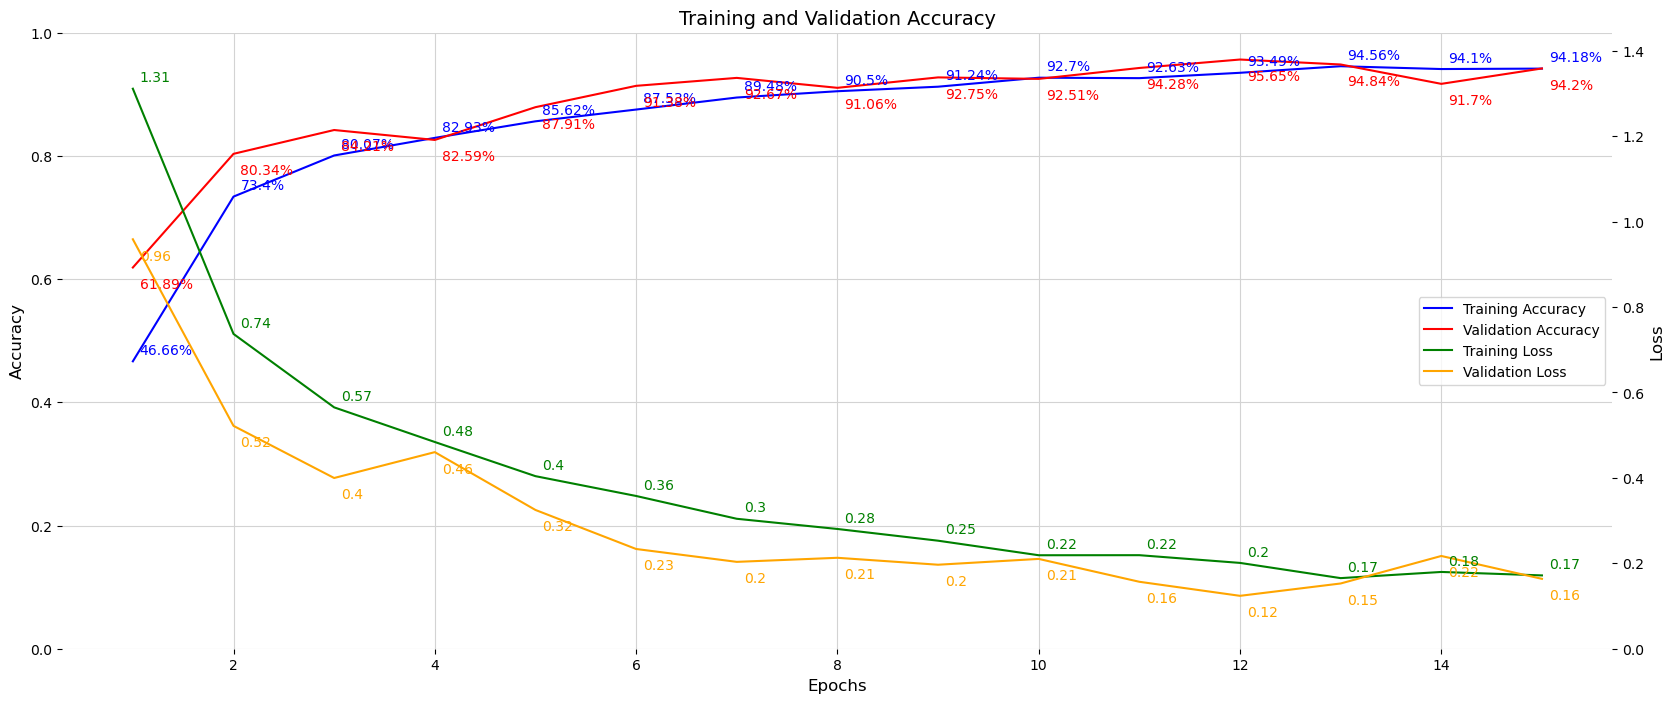

In [41]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Create the figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot the trend line for training accuracy
ax1.plot(epochs, training_accuracy, 'b', label='Training Accuracy')

# Plot the trend line for validation accuracy
ax1.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')

# Set y-axis limits for accuracy
ax1.set_ylim([0, 1])

# Set plot title, x-axis label, and y-axis label for accuracy
ax1.set_title('Training and Validation Accuracy', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)

# Create a twin y-axis for loss
ax2 = ax1.twinx()

# Plot the trend line for training loss
ax2.plot(epochs, training_loss, 'green', label='Training Loss')

# Plot the trend line for validation loss
ax2.plot(epochs, validation_loss, 'orange', label='Validation Loss')

# Set y-axis limits for loss
ax2.set_ylim([0, max(training_loss + validation_loss) * 1.1])

# Set y-axis label for loss
ax2.set_ylabel('Loss', fontsize=12)

# Remove the frames of the plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add gridlines
ax1.grid(color='lightgray', linestyle='-')

# Customize tick labels
ax1.tick_params(axis='both', which='major', labelsize=10)

# Add labels to the data points for accuracy
for i, acc in enumerate(training_accuracy):
    ax1.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, 5),
        textcoords='offset points', fontsize=10, color='b'
    )
    
for i, acc in enumerate(validation_accuracy):
    ax1.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, -15), 
        textcoords='offset points', fontsize=10, color='r'
    )

# Add labels to the data points for loss
for i, loss in enumerate(training_loss):
    ax2.annotate(
        f'{round(loss, 2)}', xy=(i+1, loss), xytext=(5, 5),
        textcoords='offset points', fontsize=10, color='green'
    )
    
for i, loss in enumerate(validation_loss):
    ax2.annotate(
        f'{round(loss, 2)}', xy=(i+1, loss), xytext=(5, -15), 
        textcoords='offset points', fontsize=10, color='orange'
    )

# Combine the legend for accuracy and loss and position it in the middle right
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles + handles2, labels + labels2, fontsize=10, loc='center right')

# Save the plot as an image
plt.savefig('Accuracy and Loss Trend_2.png', dpi=300)

# Display the plot
plt.show()

In [42]:
import tensorflow.keras as keras

# Save the model
model.save('tomato_disease_model_7.h5')


In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

---
# Results and Evaluation:

- The trained model achieved impressive results, demonstrating high accuracy in detecting malaria parasites.
- The model's performance was evaluated on a separate test dataset, yielding a test accuracy of approximately 96.08% and a test loss of 0.135.
- The high accuracy of the model showcases its effectiveness in real-world scenarios and its potential impact on healthcare diagnostics.
- The model successfully identifies infected blood cells, which can aid healthcare professionals in making accurate diagnoses and providing timely treatment.

---
# Conclusion:

The Malaria Detection project demonstrates the power of deep learning and computer vision techniques in improving healthcare diagnostics. By automating the malaria detection process, the developed model can assist medical professionals in quickly and accurately diagnosing malaria, especially in regions where access to expert pathologists is limited. This project contributes to the advancement of disease diagnosis and treatment and showcases the potential of artificial intelligence in addressing critical healthcare challenges.